# Compte Rendu TP 6 - Multilayer perceptron MLP 


**Brahim ALAOUI**

**Master : BIBDA**


## Le modèle MLP sur la dataset IRIS.

In [1]:
# Importe les librairies necessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [3]:
# Charge le dataset « IRIS_dataset.csv ».
# Créer un DataFrame pour faciliter la manipulation des donnees
df = pd.read_csv("IRIS_dataset.csv")
#visualisation des donnees
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,0.0,9.0,10.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df['species'].value_counts()

species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

**Apropos de Dataset** 

-sepal_length - Length of the sepal (in cm)

-sepal_width - Width of the sepal (in cm)

-petal_length - Length of the petal (in cm)

-Petal_width - Width of the petal (in cm)

-species - there are 3 Iris species(Setosa, 
Versicolo, 
Virgini, ea)ch with 50 samples

In [8]:
# des mesures statistiques sur dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.036667,3.808000,1.266000
std,0.828066,0.502266,1.806644,1.055241
min,4.300000,0.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,9.000000,10.200000


In [10]:
# des informations generales sur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# verifie le nombre de valeurs manquantes (NaN) dans chaque colonne du DataFrame.
# isnull() identifie les valeurs manquantes et sum() les additionne pour chaque colonne.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

le graphique montre la relation entre la longueur et la largeur des sepales, avec les differentes especes representees par des couleurs distinctes.

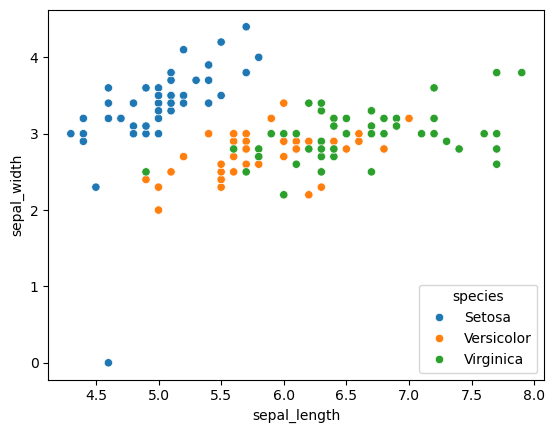

In [15]:
sns.scatterplot(df, x="sepal_length", y="sepal_width", hue="species");

visuellement les relations entre toutes les paires de variables numériques dans le DataFrame, en coloriant les points selon la catégorie d'espèce.

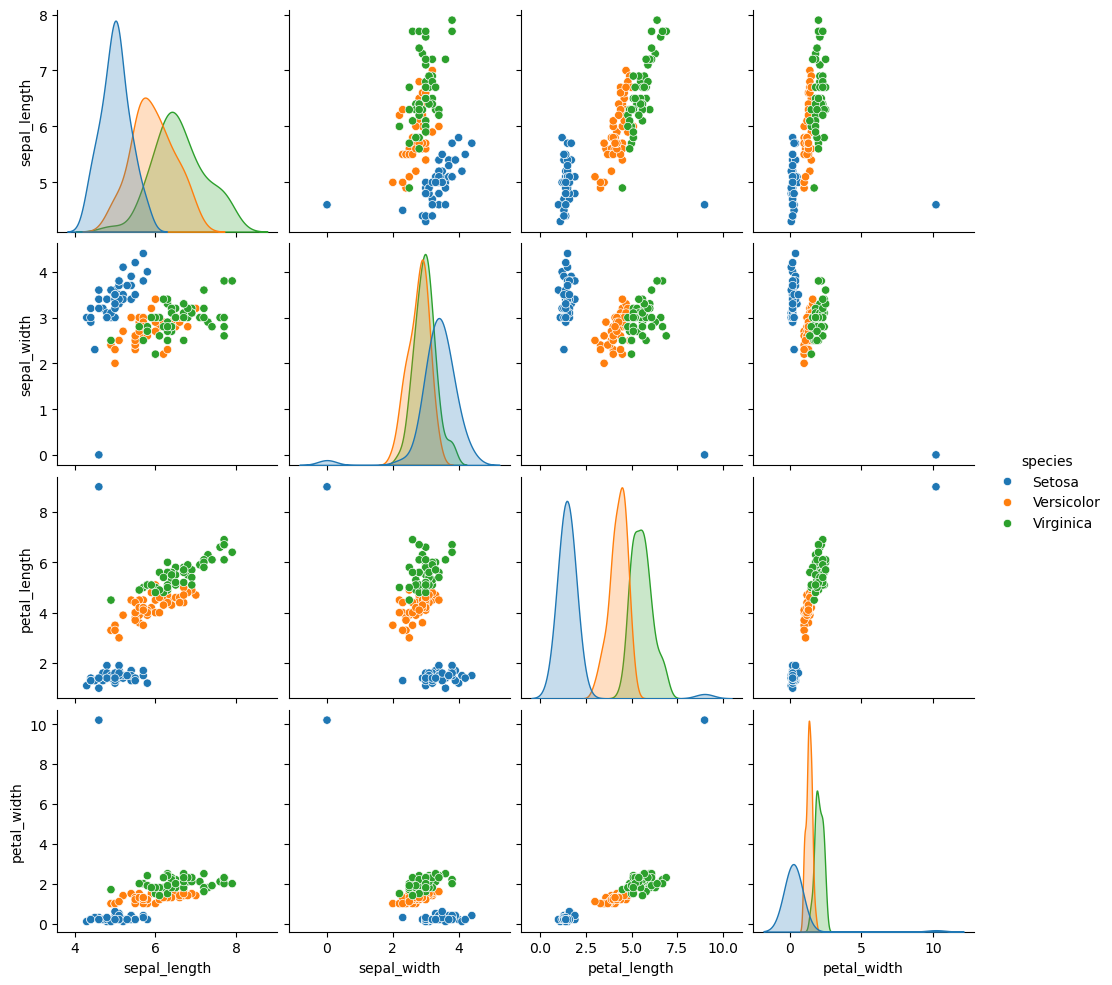

In [18]:
# Cree une matrice de graphiques de dispersion pour chaque paire de variables numériques du DataFrame.
# Chaque paire de variables est representee par un graphique de dispersion, et la diagonale montre des histogrammes ou des estimations de densite.
# L'argument 'hue' permet de differencier les points selon la colonne 'species', en attribuant des couleurs distinctes à chaque espece.
sns.pairplot(df, hue='species');

visuellement la force des relations entre les variables numériques du DataFrame à l'aide d'une matrice de corrélation, avec des annotations indiquant les valeurs exactes de corrélation.

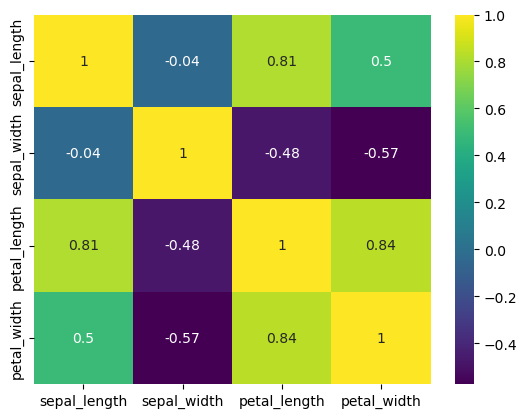

In [21]:
# Crée une carte thermique (heatmap) pour visualiser les corrélations entre les variables numériques du DataFrame.
# 'df.corr(numeric_only=True)' calcule la matrice de corrélation pour les colonnes numériques du DataFrame.
# 'cmap' définit la palette de couleurs utilisée pour la heatmap (ici, la palette 'viridis').
# 'annot=True' affiche les valeurs de corrélation directement sur chaque cellule de la carte.
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True);

le "LabelEncoder" de la bibliothèque "sklearn" pour transformer les valeurs catégorielles dans la colonne 'species' en valeurs numériques

In [24]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding 'Iris-setosa'
df['species'] = LabelEncoder().fit_transform(df['species'])

In [26]:
# preparation des donnees
# separe les donnees en variables independantes (X) et la variable dependante (y,)
X = df.drop('species', axis=1)
y = df['species']
# normalisation des donnees (cruciale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# separation en ensembles d'entrainement, validation et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(96, 4) (96,)
(30, 4) (30,)
(24, 4) (24,)


# construction du modele

Couche d'entrée avec 64 neurones et activation ReLU.  L'input_shape est crucial pour la première couche et spécifie le nombre de caractéristiques d'entrée.

Couche cachée intermédiaire avec 32 neurones et activation ReLU. Cette couche apprend des représentations plus complexes des données.

Couche cachée intermédiaire avec 16 neurones et activation ReLU.  Chaque couche intermédiaire apprend des représentations de plus en plus abstraites des données.

Couche de sortie avec 1 neurone.  C'est une régression car on prédit une seule valeur (species).

In [29]:
# construction du modele
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'),  
    Dense(1)  
])

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilation du modèle

In [32]:
# compilation du modele
model.compile(
  optimizer='adam', 
  loss='mse', 
  metrics=['mae'])


# Entraînement du modèle

In [35]:
# entrainement du modele
history = model.fit(
  X_train, 
  y_train, 
  epochs=100, 
  batch_size=32, 
  validation_data=(X_val, y_val), 
  verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 551ms/step - loss: 1.8454 - mae: 1.1208 - val_loss: 1.2597 - val_mae: 0.9115
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 1.6846 - mae: 1.0528 - val_loss: 1.1759 - val_mae: 0.8660
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 1.6308 - mae: 1.0334 - val_loss: 1.1063 - val_mae: 0.8472
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 1.3328 - mae: 0.8993 - val_loss: 1.0499 - val_mae: 0.8366
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.2605 - mae: 0.8640 - val_loss: 1.0018 - val_mae: 0.8233
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1.2713 - mae: 0.8871 - val_loss: 0.9468 - val_mae: 0.7999
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 1.0414 - mae: 0.7968 - val_loss: 0.8866 - val_mae: 0.7685
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.8897 - mae: 0.7234 - val_loss: 0.8431 - val_mae: 0.7363
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.867

In [37]:
# evaluation du modele sur l'ensemble de test
loss, mae = model.evaluate(X_test, y_test)
print("Erreur absolue moyenne (MAE) :", mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0696 - mae: 0.1912
Erreur absolue moyenne (MAE) : 0.19123432040214539


In [51]:
# predictions et metriques
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
MSE: 0.07
R-squared: 0.90


In [53]:
# Interpretation des resultats 
print("La MSE de", mse, "indique l'erreur moyenne des prédictions. Plus cette valeur est faible, meilleure est la précision du modèle.")
print("Le R-squared de", r2, "indique la proportion de la variance expliquée par le modèle. Plus il est proche de 1, meilleur est le modèle.")

if r2 > 0.8:
  print("Le modèle a un bon niveau de prédiction.")
elif r2 > 0.6:
  print("Le modèle présente une performance moyenne.")
else:
  print("Le modèle doit être amélioré pour obtenir des prédictions fiables.")

if mse < 20:
    print("Le modèle prédit les valeurs avec une bonne précision.")
else:
    print("Le modèle prédit les valeurs avec une précision qui peut être améliorée.")


La MSE de 0.06955889215367286 indique l'erreur moyenne des prédictions. Plus cette valeur est faible, meilleure est la précision du modèle.
Le R-squared de 0.9004721733890213 indique la proportion de la variance expliquée par le modèle. Plus il est proche de 1, meilleur est le modèle.
Le modèle a un bon niveau de prédiction.
Le modèle prédit les valeurs avec une bonne précision.


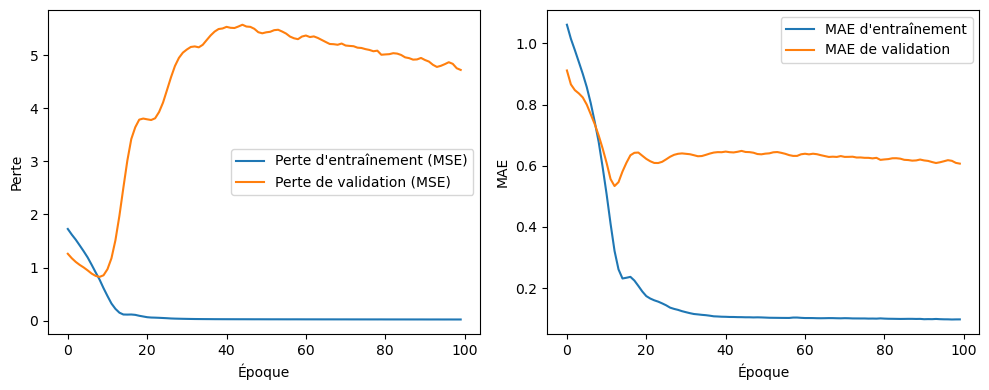

In [55]:
# 9. Analyse de la courbe d'apprentissage
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement (MSE)')
plt.plot(history.history['val_loss'], label='Perte de validation (MSE)')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE d\'entraînement')
plt.plot(history.history['val_mae'], label='MAE de validation')
plt.xlabel('Époque')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


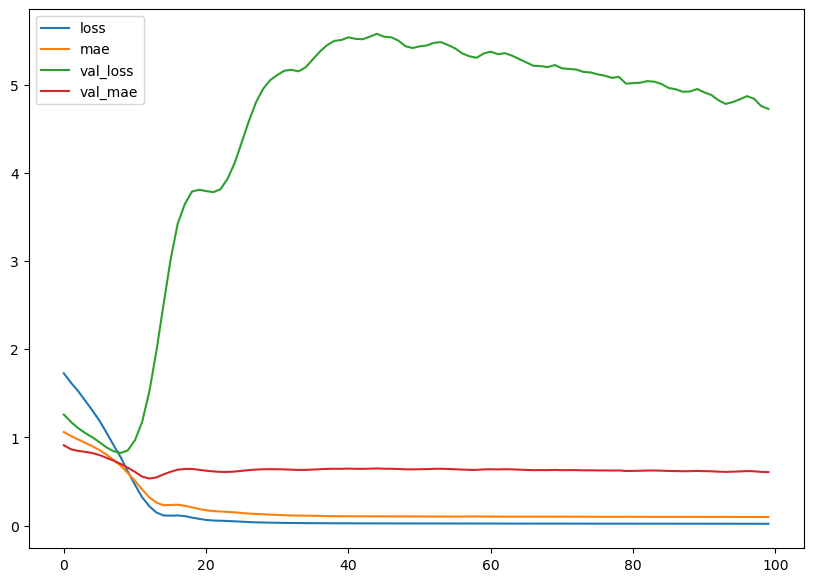

In [57]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

brahimalaoui0216@dmail.com

+212657575390

Brahim ALAOUI

### Merci bcp  🙏🏼🫶🏽